In [1]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Combine DataFrames").getOrCreate()

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 3, Finished, Available, Finished)

In [2]:
df = spark.read.format("csv").option("header","true").load("Files/fote1Sterilization Container Level ternio.csv")
# df now is a Spark DataFrame containing CSV data from "Files/fote1Sterilization Container Level ternio.csv".
display(df)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 4, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 26e52957-b43d-4efa-972b-7969251dd833)

In [3]:
df2 = spark.read.format("csv").option("header","true").load("Files/fote2Sterilization Container Level ternio.csv")
# df now is a Spark DataFrame containing CSV data from "Files/fote2Sterilization Container Level ternio.csv".
display(df2)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 5, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, b5e7832f-a1ed-439d-a496-484ba276281b)

In [4]:
df3 = spark.read.format("csv").option("header","true").load("Files/fote3Sterilization Container Level ternio.csv")
# df now is a Spark DataFrame containing CSV data from "Files/fote3Sterilization Container Level ternio.csv".
display(df3)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, fc180137-56d4-4352-a58e-846591d94fd3)

In [5]:
df4 = spark.read.format("csv").option("header","true").load("Files/fote4Sterilization Container Level ternio.csv")
# df now is a Spark DataFrame containing CSV data from "Files/fote4Sterilization Container Level ternio.csv".
display(df4)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5b7c7b2a-2775-41de-a0db-44ecba677345)

In [6]:
df5 = spark.read.format("csv").option("header","true").load("Files/foteContainer General Information.csv")
# df now is a Spark DataFrame containing CSV data from "Files/foteContainer General Information.csv".
display(df5)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 8, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, af00eb8d-cc54-4dc9-94c7-90e5151bccf3)

In [7]:
df6 = spark.read.format("csv").option("header","true").load("Files/foteContainer Product Detail ternio.csv")
# df now is a Spark DataFrame containing CSV data from "Files/foteContainer Product Detail ternio.csv".
display(df6)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 9, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c854ef9a-2eed-4d16-a997-98afdcd553e9)

In [8]:
df7 = spark.read.format("csv").option("header","true").load("Files/foteternio Inventory Summary.csv")
# df now is a Spark DataFrame containing CSV data from "Files/foteternio Inventory Summary.csv".
display(df7)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 10, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 46e2fa19-2f2d-4b44-b57f-106afb6c8ba5)

In [9]:
df8 = spark.read.format("csv").option("header","true").load("Files/foteternio container inventory.csv")
# df now is a Spark DataFrame containing CSV data from "Files/foteternio container inventory.csv".
display(df8)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 11, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c02cd407-dc68-40e7-b97e-b2574111d66f)

In [10]:
# ===============================================================
# Medical City Dallas — Full ETL + Analytics (pandas + matplotlib)
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hashlib
from datetime import datetime, timedelta

# ---------- Config ----------
# Your uploaded file paths (from earlier messages)
PATHS = {
    "st1": "Files/fote1Sterilization Container Level ternio.csv", 
    "st2": "Files/fote2Sterilization Container Level ternio.csv",
    "st3": "Files/fote3Sterilization Container Level ternio.csv",
    "st4": "Files/fote4Sterilization Container Level ternio.csv",
    "gi":  "Files/foteContainer General Information.csv",
    "pd":  "Files/foteContainer Product Detail ternio.csv",
    "inv": "Files/foteternio Inventory Summary.csv",
    "invsum": "Files/foteternio container inventory.csv",
}

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 12, Finished, Available, Finished)

In [11]:

# If you need to merge "The Medical Center 1/2/3" style labels into one:
FACILITY_MERGE = {
    # "THE MEDICAL CENTER 1": "THE MEDICAL CENTER",
    # "THE MEDICAL CENTER 2": "THE MEDICAL CENTER",
    # "THE MEDICAL CENTER 3": "THE MEDICAL CENTER",
    # Add other site-specific merges if needed
}

# Services you may want to exclude in Pareto / visuals
SERVICES_TO_EXCLUDE = set([
    "LOANER", "DEPARTMENT", "STERILE PROCESSING",
    "MAXFACE", "OUTSIDE SERVICE", "ZZ_DATABASE CLEANUP"
])

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 13, Finished, Available, Finished)

In [12]:
# ---------- Helpers ----------
def read_csv_robust(path):
    """Try a couple encodings and options so messy CSVs still load."""
    for enc in ["utf-8-sig", "utf-8", "latin-1"]:
        try:
            return pd.read_csv(path, dtype=str, encoding=enc, engine="python")
        except Exception:
            pass
    # last resort
    return pd.read_csv(path, dtype=str, engine="python")

def normalize_columns(df):
    """Lowercase, strip, replace spaces with single spaces; unify column names lightly."""
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
                  .str.replace(r"\s+", " ", regex=True)
                  .str.replace(r"[^\w\s/:-]", "", regex=True)
                  .str.lower()
    )
    return df

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 14, Finished, Available, Finished)

In [13]:
def best_col(df, aliases):
    """Find the first existing column in df that matches any alias list (case-insensitive)."""
    cols = list(df.columns)
    for a in aliases:
        a_low = a.lower()
        for c in cols:
            if c == a_low:
                return c
    # substring/contains fallback
    for a in aliases:
        a_low = a.lower()
        matches = [c for c in cols if a_low in c]
        if matches:
            return matches[0]
    return None

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 15, Finished, Available, Finished)

In [14]:
def parse_datetime_series(s: pd.Series):
    """Parse mixed date/time formats including Excel serials."""
    if s is None:
        return pd.Series(pd.NaT, index=pd.RangeIndex(0))
    s = s.astype(str).str.strip()

    # Try numeric (Excel serial)
    def excel_to_ts(x):
        try:
            if x == "" or x.lower() in {"nan", "none"}:
                return pd.NaT
            if str(x).isdigit() or str(x).replace(".", "", 1).isdigit():
                # Excel serial (using 1899-12-30 base, common in Windows Excel)
                base = datetime(1899, 12, 30)
                days = float(x)
                if days > 0:
                    # split integer days + fractional
                    whole = int(days)
                    frac = days - whole
                    return base + timedelta(days=whole, seconds=int(frac*86400))
        except Exception:
            pass
        return pd.NaT

    excel_guess = s.apply(excel_to_ts)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 16, Finished, Available, Finished)

In [15]:
# --- Replace your parse_datetime_series with this version ---
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

def parse_datetime_series(raw):
    """Parse mixed date/time formats, including Excel serials, into pandas Timestamps."""
    # Make sure we have a Series
    s = pd.Series(raw).astype(str).str.strip()

    # 1) Excel serials
    def excel_to_ts(x):
        try:
            if x == "" or x.lower() in {"nan", "none"}:
                return pd.NaT
            # numeric? (int or float as string)
            if str(x).isdigit() or str(x).replace(".", "", 1).isdigit():
                base = datetime(1899, 12, 30)   # Excel's Windows epoch
                days = float(x)
                if days > 0:
                    whole = int(days)
                    frac = days - whole
                    return base + timedelta(days=whole, seconds=int(frac*86400))
        except Exception:
            pass
        return pd.NaT

    excel_guess = s.apply(excel_to_ts)

    # 2) Try common explicit patterns
    patterns = [
        "%m/%d/%Y %H:%M:%S",
        "%m/%d/%Y %H:%M",
        "%m/%d/%Y",
        "%Y-%m-%d %H:%M:%S",
        "%Y-%m-%d %H:%M",
        "%Y-%m-%d",
        "%m-%d-%Y %H:%M:%S",
        "%m-%d-%Y %H:%M",
        "%m-%d-%Y",
    ]

    parsed = pd.Series(pd.NaT, index=s.index)
    for p in patterns:
        mask = parsed.isna()
        if mask.any():
            parsed.loc[mask] = pd.to_datetime(s[mask], format=p, errors="coerce")

    # 3) Last resort: pandas auto-parse
    parsed = parsed.fillna(pd.to_datetime(s, errors="coerce"))

    # Prefer parsed when available, else excel_guess
    out = parsed.fillna(excel_guess)
    return out


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 17, Finished, Available, Finished)

In [16]:
def normalize_facility(s: pd.Series):
    if s is None:
        return s
    x = (s.astype(str).str.strip().str.upper()
            .str.replace(r"^(MH|MEMORIAL HERMANN)\s+", "", regex=True)
            .str.replace(r"\s+", " ", regex=True))
    x = x.replace(FACILITY_MERGE)  # merge 1/2/3 -> one if configured
    return x

def normalize_service(s: pd.Series):
    if s is None:
        return s
    return (s.astype(str).str.strip().str.upper()
             .str.replace(r"\s+", " ", regex=True))

def coalesce_cols(df, targets, aliases):
    """Create a canonical column with name 'targets[0]' by coalescing from alias columns present."""
    t = targets[0]
    for a in aliases:
        col = best_col(df, [a])
        if col:
            df[t] = df.get(t).fillna(df[col]) if t in df.columns else df[col]
    return df

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 18, Finished, Available, Finished)

In [17]:
def add_container_index(df):
    """Ensure a 'containerindex' exists; if not, create a stable hash key from available fields."""
    cols = df.columns
    candidates = ["container index", "container_index", "containerindex"]
    ci = None
    for c in candidates:
        if c in cols:
            ci = c
            break
    if ci and ci != "containerindex":
        df = df.rename(columns={ci: "containerindex"})
        ci = "containerindex"
    if "containerindex" not in df.columns:
        # build from common fields
        for k in ["facility", "container", "container barcode", "container serial number", "service", "name"]:
            if k not in df.columns:
                df[k] = np.nan
        # hash
        def mk_hash(row):
            parts = [str(row.get(k, "")) for k in ["facility","container","container barcode","container serial number","service","name"]]
            src = "|".join(parts)
            return hashlib.sha256(src.encode("utf-8")).hexdigest()[:16] if src.strip("|") else np.nan
        df["containerindex"] = df.apply(mk_hash, axis=1)
    return df

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 19, Finished, Available, Finished)

In [18]:
# ===========================
# Fabric Lakehouse loader
# ===========================
from notebookutils import mssparkutils
from pyspark.sql import functions as F
from pyspark.sql import DataFrame

# In Fabric notebooks, Lakehouse files are under the relative path "Files/"
ROOT = "Files/"

# ---- helpers ----
def list_files(root=ROOT):
    return [f.path for f in mssparkutils.fs.ls(root) if f.isFile]

def find_first_by_tokens(files, *tokens):
    """
    Return the FIRST file path whose name contains ALL tokens (case-insensitive).
    """
    toks = [t.lower() for t in tokens]
    for p in files:
        name = p.split("/")[-1].lower()
        if all(t in name for t in toks):
            return p
    return None

def find_all_by_tokens(files, *tokens):
    """Return ALL file paths whose name contains ALL tokens (case-insensitive)."""
    toks = [t.lower() for t in tokens]
    matches = []
    for p in files:
        name = p.split("/")[-1].lower()
        if all(t in name for t in toks):
            matches.append(p)
    return matches

def load_csv(path) -> DataFrame:
    return (
        spark.read.format("csv")
        .option("header", "true")
        .option("inferSchema", "false")
        .option("multiLine", "true")    # safer for embedded commas/newlines
        .option("escape", '"')
        .option("quote", '"')
        .load(path)
    )

def normalize_cols(df: DataFrame) -> DataFrame:
    """
    Lowercase + trim + squeeze whitespace in column names.
    """
    import re
    new_cols = []
    for c in df.columns:
        c2 = re.sub(r"\s+", " ", c.strip().lower())
        new_cols.append(c2)
    return df.toDF(*new_cols)

def safe_union(dfs):
    """
    Union a list of DataFrames allowing missing columns.
    """
    if not dfs:
        return None
    out = dfs[0]
    for d in dfs[1:]:
        out = out.unionByName(d, allowMissingColumns=True)
    return out

# ---- discover files in Lakehouse ----
all_files = list_files()
print("Found files under Files/:")
for p in sorted(all_files):
    print("  -", p.split("/")[-1])

# Your uploads (based on names you shared):
# Sterilization Container Level (4 parts)
st_files = find_all_by_tokens(all_files, "sterilization container level", "ternio")
# Some of your files look like "fote1Sterilization Container Level ternio.csv" etc.
# If any came without "ternio" in the name, pull them in too:
if len(st_files) < 4:
    extras = find_all_by_tokens(all_files, "sterilization container level")
    # avoid duplicates
    st_files = list({*st_files, *extras})

# GI / PD / MI / Inventory Summary
gi_file  = find_first_by_tokens(all_files, "container general information")
pd_file  = find_first_by_tokens(all_files, "container product detail")
mi_file  = find_first_by_tokens(all_files, "ternio container inventory")
inv_file = find_first_by_tokens(all_files, "ternio inventory summary")

print("\nResolved paths:")
print("  Sterilization parts:", [p.split('/')[-1] for p in st_files])
print("  GI:",  gi_file.split('/')[-1]  if gi_file  else None)
print("  PD:",  pd_file.split('/')[-1]  if pd_file  else None)
print("  MI:",  mi_file.split('/')[-1]  if mi_file  else None)
print("  INV_SUM:", inv_file.split('/')[-1] if inv_file else None)

# ---- load dataframes ----
st_dfs = []
for p in sorted(st_files):
    try:
        df = load_csv(p)
        df = normalize_cols(df)
        st_dfs.append(df)
        print(f"Loaded ST part: {p.split('/')[-1]}  rows={df.count():,}  cols={len(df.columns)}")
    except Exception as e:
        print(f"[WARN] Failed to read {p}: {e}")

if not st_dfs:
    raise RuntimeError("No Sterilization Container Level files were loaded. Check filenames under Files/.")

st = safe_union(st_dfs).cache()
print(f"\nCombined Sterilization dataframe: rows={st.count():,}  cols={len(st.columns)}")

gi = normalize_cols(load_csv(gi_file)).cache()  if gi_file  else None
pd_df = normalize_cols(load_csv(pd_file)).cache() if pd_file  else None
mi = normalize_cols(load_csv(mi_file)).cache()   if mi_file  else None
inv_sum = normalize_cols(load_csv(inv_file)).cache() if inv_file else None

def show_info(df: DataFrame, name: str, n=5):
    if df is None:
        print(f"\n{name}: NOT LOADED")
        return
    print(f"\n{name}: rows={df.count():,}  cols={len(df.columns)}")
    df.show(n, truncate=False)

# quick peeks
show_info(st, "st (Sterilization)")
show_info(gi, "gi (General Information)")
show_info(pd_df, "pd (Product Detail)")
show_info(mi, "mi (Inventory)")
show_info(inv_sum, "inv_sum (Inventory Summary)")

# ---- optional: create temp views for SQL exploration ----
st.createOrReplaceTempView("st")
if gi is not None: gi.createOrReplaceTempView("gi")
if pd_df is not None: pd_df.createOrReplaceTempView("pd")
if mi is not None: mi.createOrReplaceTempView("mi")
if inv_sum is not None: inv_sum.createOrReplaceTempView("inv_sum")

print("\nTemp views registered: st, gi, pd, mi, inv_sum (as available).")


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 20, Finished, Available, Finished)

Found files under Files/:
  - fote1Sterilization Container Level ternio.csv
  - fote2Sterilization Container Level ternio.csv
  - fote3Sterilization Container Level ternio.csv
  - fote4Sterilization Container Level ternio.csv
  - foteContainer General Information.csv
  - foteContainer Product Detail ternio.csv
  - foteternio Inventory Summary.csv
  - foteternio container inventory.csv

Resolved paths:
  Sterilization parts: ['fote1Sterilization Container Level ternio.csv', 'fote2Sterilization Container Level ternio.csv', 'fote3Sterilization Container Level ternio.csv', 'fote4Sterilization Container Level ternio.csv']
  GI: foteContainer General Information.csv
  PD: foteContainer Product Detail ternio.csv
  MI: foteternio container inventory.csv
  INV_SUM: foteternio Inventory Summary.csv
Loaded ST part: fote1Sterilization Container Level ternio.csv  rows=40,905  cols=17
Loaded ST part: fote2Sterilization Container Level ternio.csv  rows=29,308  cols=17
Loaded ST part: fote3Sterilizati

In [19]:
# ============================
# 0) Imports & Spark settings
# ============================
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from pyspark.sql import Window
from pyspark.sql import DataFrame

spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

# ============================
# 1) Load all Lakehouse tables
# ============================
# NOTE: replace with your Fabric Lakehouse/SQL references if different
lakehouse_base = "Files"  # Fabric Lakehouse "Files" mount

paths = {
    "st1": f"{lakehouse_base}/fote1Sterilization Container Level ternio.csv",
    "st2": f"{lakehouse_base}/fote2Sterilization Container Level ternio.csv",
    "st3": f"{lakehouse_base}/fote3Sterilization Container Level ternio.csv",
    "st4": f"{lakehouse_base}/fote4Sterilization Container Level ternio.csv",
    "pd":  f"{lakehouse_base}/foteContainer Product Detail ternio.csv",
    "inv": f"{lakehouse_base}/foteternio container inventory.csv",
    "gi":  f"{lakehouse_base}/foteContainer General Information.csv",
    "is":  f"{lakehouse_base}/foteternio Inventory Summary.csv",
}

def read_csv(path: str) -> DataFrame:
    return (spark.read
                 .format("csv")
                 .option("header", "true")
                 .option("inferSchema", "false")
                 .option("multiLine", "true")
                 .option("escape", "\"")
                 .load(path))

def normalize_columns(df: DataFrame) -> DataFrame:
    # lower-case, trim, replace spaces with single space, then spaces->underscores
    new = []
    for c in df.columns:
        c2 = c.strip().lower()
        c2 = re.sub(r"\s+", " ", c2)
        c2 = c2.replace(" ", "_")
        new.append(c2)
    return df.toDF(*new)

# Sterilization (4 parts)
st_list = []
for k in ["st1","st2","st3","st4"]:
    _df = read_csv(paths[k])
    _df = normalize_columns(_df)
    st_list.append(_df)

st = st_list[0]
for d in st_list[1:]:
    st = st.unionByName(d, allowMissingColumns=True)

# Other subject tables
pd_df  = normalize_columns(read_csv(paths["pd"]))
inv_df = normalize_columns(read_csv(paths["inv"]))
gi_df  = normalize_columns(read_csv(paths["gi"]))
is_df  = normalize_columns(read_csv(paths["is"]))

# Cache
st = st.cache(); pd_df = pd_df.cache(); inv_df = inv_df.cache(); gi_df = gi_df.cache(); is_df = is_df.cache()

# ==========================================================
# 2) Safe timestamp parsing (tolerant to many US/ISO formats)
# ==========================================================
def safe_ts(col):
    pats = [
        "M/d/yyyy H:mm:ss", "M/d/yyyy H:mm",
        "MM/dd/yyyy HH:mm:ss", "MM/dd/yyyy HH:mm",
        "M/d/yyyy h:mm:ss a", "M/d/yyyy h:mm a",
        "yyyy-MM-dd HH:mm:ss", "yyyy-MM-dd HH:mm",
        "yyyy-M-d H:mm:ss", "yyyy-M-d H:mm",
        "M-d-yyyy H:mm:ss", "M-d-yyyy H:mm",
        "MM-dd-yyyy HH:mm:ss", "MM-dd-yyyy HH:mm",
        "M/d/yyyy", "MM/dd/yyyy", "yyyy-MM-dd", "M-d-yyyy", "MM-dd-yyyy"
    ]
    c = None
    for i, p in enumerate(pats):
        c = F.coalesce(c, F.to_timestamp(col, p)) if i else F.to_timestamp(col, p)
    return c

# Find the date column in st (common names we’ve seen)
date_col = None
for cand in ["sterilized_date/time", "sterilized_date_time", "sterilized_datetime", "date", "datetime", "timestamp"]:
    if cand in st.columns:
        date_col = cand
        break
if date_col is None:
    raise ValueError("Could not find sterilization datetime column in st.*")

st_dates = (
    st.withColumn("processts", safe_ts(F.col(date_col)))
      .withColumn("yearmonth", F.date_format("processts", "yyyy-MM"))
      .withColumn("day", F.date_format("processts", "yyyy-MM-dd"))
      .cache()
)


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 21, Finished, Available, Finished)

In [23]:
# ============================
# 0) Imports & small helpers
# ============================
import re
import pyspark.sql.functions as F
from pyspark.sql import DataFrame

# If you need to collapse sites (leave empty or add rules if you have them)
FACILITY_MERGE = {
    # Example:
    # "THE MEDICAL CENTER 1": "THE MEDICAL CENTER",
    # "THE MEDICAL CENTER 2": "THE MEDICAL CENTER",
    # "THE MEDICAL CENTER 3": "THE MEDICAL CENTER",
}

def normalize_facility(col):
    x = F.upper(F.trim(col))
    x = F.regexp_replace(x, r"\s+", " ")
    # optional collapse of numbered sites like "... 1/2/3"
    x = F.regexp_replace(x, r"\bTHE MEDICAL CENTER\s*\d+\b", "THE MEDICAL CENTER")
    return x

def name_core(col):
    # Upper, remove digits, drop common container words, squeeze spaces, keep A-Z & space
    x = F.upper(F.trim(col))
    x = F.regexp_replace(x, r"[0-9]", " ")
    x = F.regexp_replace(
        x,
        r"\b(SET|TRAY|BASKET|LID|CASE|INSERT|KIT|REV|REVISION|VER|V|SMALL|MEDIUM|LARGE|COVER|COVERS)\b",
        " ",
    )
    x = F.regexp_replace(x, r"[^A-Z ]", " ")
    x = F.regexp_replace(x, r"\s+", " ")
    return F.trim(x)

def actual_key(col):
    return F.regexp_replace(F.upper(F.trim(col)), r"\s+", " ")

# --- Replace your serial8() with this regex-based version ---
def serial8(col):
    # 1) Keep only letters/digits (strip spaces, dashes, etc.)
    squeezed = F.upper(F.regexp_replace(F.trim(col), r"[^0-9A-Za-z]", ""))
    # 2) Longest run of digits (>= 8) — first such run
    run = F.regexp_extract(squeezed, r"(\d{8,})", 1)
    # 3) Take the LAST 8 digits of that run using an end-anchored regex
    last8 = F.when(F.length(run) >= 8, F.regexp_extract(run, r"(\d{8})$", 1))
    return last8

def coalesce_str(*cols):
    c = None
    for i, col in enumerate(cols):
        c = F.coalesce(c, col) if i else col
    return c

# Try to guess a 'container index' style column name
def guess_ci_col(df: DataFrame):
    if df is None: 
        return None
    for c in df.columns:
        lc = c.lower()
        if re.search(r"\b(container[_ ]?index|ci(_id)?|container_id|cont[_ ]?idx)\b", lc):
            return c
    return None

# Normalizes keys on an arbitrary DF (adds namekey/actualkey/serialkey/serial8/facilitykey if missing)
def with_normalized_keys(d: DataFrame) -> DataFrame:
    if d is None:
        return None

    # namekey
    if "namekey" not in d.columns:
        for c in ["container_name", "container", "tray_name", "set_name"]:
            if c in d.columns:
                d = d.withColumn("namekey", name_core(F.col(c))); break
        else:
            d = d.withColumn("namekey", F.lit(None).cast("string"))

    # actualkey
    if "actualkey" not in d.columns:
        for c in ["container_actual", "actual", "complexity_level"]:
            if c in d.columns:
                d = d.withColumn("actualkey", actual_key(F.col(c))); break
        else:
            d = d.withColumn("actualkey", F.lit(None).cast("string"))

    # serialkey + serial8
    if "serialkey" not in d.columns:
        ser_col = None
        for c in ["container_serial_number", "container_barcode", "serial", "barcode", "container barcode"]:
            if c in d.columns:
                ser_col = c; break
        if ser_col:
            d = d.withColumn("serialkey", F.upper(F.regexp_replace(F.col(ser_col), r"\s+", ""))) \
                 .withColumn("serial8",  serial8(F.col(ser_col)))
        else:
            if "serial8" not in d.columns:
                d = d.withColumn("serial8", F.lit(None).cast("string"))
            d = d.withColumn("serialkey", F.lit(None).cast("string"))
    else:
        if "serial8" not in d.columns:
            d = d.withColumn("serial8", serial8(F.col("serialkey")))

    # facilitykey
    if "facilitykey" not in d.columns:
        fac_col = None
        for c in ["facility","site","location","current_location","current location"]:
            if c in d.columns:
                fac_col = c; break
        if fac_col:
            d = d.withColumn("facilitykey", normalize_facility(F.col(fac_col)))
        else:
            d = d.withColumn("facilitykey", F.lit(None).cast("string"))

    # service normalization (optional; helps later analytics)
    if "servicenorm" not in d.columns:
        svc_col = None
        for c in ["service","dept","department"]:
            if c in d.columns:
                svc_col = c; break
        if svc_col:
            d = d.withColumn("servicenorm", F.upper(F.regexp_replace(F.trim(F.col(svc_col)), r"\s+", " ")))
        else:
            d = d.withColumn("servicenorm", F.lit("UNKNOWN"))

    return d

# Synthesizes a deterministic 16-char hex ID from the best available keys
def synthesize_containerindex(d: DataFrame) -> DataFrame:
    d = with_normalized_keys(d)
    any_key = (
        F.col("serialkey").isNotNull() |
        F.col("serial8").isNotNull()   |
        F.col("namekey").isNotNull()   |
        F.col("actualkey").isNotNull() |
        F.col("facilitykey").isNotNull()
    )
    concat_keys = F.concat_ws(
        "|",
        coalesce_str(F.col("facilitykey"), F.lit("")),
        coalesce_str(F.col("namekey"),     F.lit("")),
        coalesce_str(F.col("actualkey"),   F.lit("")), 
        coalesce_str(F.col("serialkey"),   F.lit("")),
        coalesce_str(F.col("serial8"),     F.lit("")),
    )
    return (
        d.where(any_key)
         .withColumn("containerindex", F.substring(F.sha2(concat_keys, 256), 1, 16))
    )

# If a DF has CI already, rename to "containerindex"; else synthesize it.
def ensure_containerindex(d: DataFrame) -> DataFrame:
    if d is None:
        return None
    ci_col = guess_ci_col(d)
    if ci_col:
        d = d.withColumnRenamed(ci_col, "containerindex")
        return with_normalized_keys(d)
    return synthesize_containerindex(d)

# ============================
# 1) Choose your fact table
# ============================
if "st_dates" in globals():
    base_st = st_dates
elif "st" in globals():
    base_st = st
else:
    raise RuntimeError("Please provide your sterilization fact DF as st or st_dates.")

st_keys = with_normalized_keys(base_st).cache()

# ============================
# 2) Ensure CI on subject DFs
# ============================
pd_map  = ensure_containerindex(pd_df)  if "pd_df"  in globals() else None
inv_map = ensure_containerindex(inv_df) if "inv_df" in globals() else None
gi_map  = ensure_containerindex(gi_df)  if "gi_df"  in globals() else None
is_map  = ensure_containerindex(is_df)  if "is_df"  in globals() else None

# Union everything we’ve got
maps = [d for d in [pd_map, inv_map, gi_map, is_map] if d is not None]
if not maps:
    raise RuntimeError("No subject datasets available to build a CI map.")
inv_map_all = maps[0].select(
    "containerindex","namekey","actualkey","serialkey","serial8","facilitykey"
)
for d in maps[1:]:
    inv_map_all = inv_map_all.unionByName(
        d.select("containerindex","namekey","actualkey","serialkey","serial8","facilitykey"),
        allowMissingColumns=True
    )

inv_map_all = inv_map_all.dropna(subset=["containerindex"]).dropDuplicates().cache()

# ============================
# 3) Signal maps (priority)
# ============================
s1_map = (
    inv_map_all.select("containerindex","serialkey")
               .where(F.col("serialkey").isNotNull())
               .dropDuplicates(["serialkey","containerindex"])
)
s2_map = (
    inv_map_all.select("containerindex","serial8")
               .where(F.col("serial8").isNotNull())
               .dropDuplicates(["serial8","containerindex"])
)
s3_map = (
    inv_map_all.select("containerindex","namekey","facilitykey")
               .where(F.col("namekey").isNotNull() & F.col("facilitykey").isNotNull())
               .dropDuplicates(["namekey","facilitykey","containerindex"])
)
s4_map = (
    inv_map_all.select("containerindex","actualkey","facilitykey")
               .where(F.col("actualkey").isNotNull() & F.col("facilitykey").isNotNull())
               .dropDuplicates(["actualkey","facilitykey","containerindex"])
)

# ============================
# 4) Join signals & coalesce
# ============================
signals = (
    st_keys
    .join(F.broadcast(s1_map), ["serialkey"], "left").withColumnRenamed("containerindex","ci_s1")
    .join(F.broadcast(s2_map), ["serial8"],  "left").withColumnRenamed("containerindex","ci_s2")
    .join(F.broadcast(s3_map), ["namekey","facilitykey"], "left").withColumnRenamed("containerindex","ci_s3")
    .join(F.broadcast(s4_map), ["actualkey","facilitykey"], "left").withColumnRenamed("containerindex","ci_s4")
    .withColumn("containerindex", F.coalesce("ci_s1","ci_s2","ci_s3","ci_s4"))
    .cache()
)

# ============================
# 5) Coverage reporting
# ============================
total_rows   = signals.count()
matched_rows = signals.where(F.col("containerindex").isNotNull()).count()
coverage_pct = 100.0 * matched_rows / max(total_rows, 1)
print(f"GI COVERAGE: {matched_rows:,}/{total_rows:,} ({coverage_pct:.1f}%)")

by_signal = (
    signals.selectExpr(
        "CASE WHEN ci_s1 IS NOT NULL THEN 'S1:serial' "
        "WHEN ci_s2 IS NOT NULL THEN 'S2:serial8' "
        "WHEN ci_s3 IS NOT NULL THEN 'S3:name+facility' "
        "WHEN ci_s4 IS NOT NULL THEN 'S4:actual+facility' "
        "ELSE 'None' END AS signal"
    )
    .groupBy("signal").agg(F.count("*").alias("rows"))
    .orderBy(F.desc("rows"))
)
by_signal.show(truncate=False)

print("Coverage by Facility:")
(
  signals.groupBy("facilitykey")
         .agg(F.count("*").alias("rows"),
              F.sum(F.when(F.col("containerindex").isNotNull(), 1).otherwise(0)).alias("matched"))
         .withColumn("coverage_pct", F.round(F.col("matched")*100.0/F.col("rows"), 1))
         .orderBy(F.desc("rows"))
).show(100, truncate=False)

print("Coverage by Service:")
(
  signals.groupBy("servicenorm")
         .agg(F.count("*").alias("rows"),
              F.sum(F.when(F.col("containerindex").isNotNull(), 1).otherwise(0)).alias("matched"))
         .withColumn("coverage_pct", F.round(F.col("matched")*100.0/F.col("rows"), 1))
         .orderBy(F.desc("rows"))
).show(100, truncate=False)


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 25, Finished, Available, Finished)

GI COVERAGE: 1,098,489,012/1,098,489,012 (100.0%)
+---------+----------+
|signal   |rows      |
+---------+----------+
|S1:serial|1098489012|
+---------+----------+

Coverage by Facility:
+-----------------------------------+---------+---------+------------+
|facilitykey                        |rows     |matched  |coverage_pct|
+-----------------------------------+---------+---------+------------+
|OR                                 |146798240|146798240|100.0       |
|STEAM 23                           |126113570|126113570|100.0       |
|L&D STORAGE 9D                     |71762880 |71762880 |100.0       |
|LOANER CHECK OUT                   |45894360 |45894360 |100.0       |
|STEAM 22                           |38212720 |38212720 |100.0       |
|SPD SHELF 62                       |33999040 |33999040 |100.0       |
|DECONTAMINATION                    |28829680 |28829680 |100.0       |
|ASC                                |28047760 |28047760 |100.0       |
|STEAM 24                      

In [28]:
# --- Replace your serial8() with this regex-based version ---
def serial8(col):
    # 1) Keep only letters/digits (strip spaces, dashes, etc.)
    squeezed = F.upper(F.regexp_replace(F.trim(col), r"[^0-9A-Za-z]", ""))
    # 2) Longest run of digits (>= 8) — first such run
    run = F.regexp_extract(squeezed, r"(\d{8,})", 1)
    # 3) Take the LAST 8 digits of that run using an end-anchored regex
    last8 = F.when(F.length(run) >= 8, F.regexp_extract(run, r"(\d{8})$", 1))
    return last8

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 30, Finished, Available, Finished)

In [29]:
# Row count per facility
facility_summary = (
    st_keys.groupBy("facilitykey")
           .agg(F.count("*").alias("rows"))
           .orderBy(F.desc("rows"))
)
facility_summary.show(20, truncate=False)

# Cross-tab: Service × Facility
service_facility = (
    st_keys.groupBy("servicenorm","facilitykey")
           .agg(F.count("*").alias("count"))
)
service_facility.show(20, truncate=False)


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 31, Finished, Available, Finished)

+------------------+-----+
|facilitykey       |rows |
+------------------+-----+
|OR                |20276|
|STEAM 23          |17234|
|L&D STORAGE 9D    |9912 |
|LOANER CHECK OUT  |6339 |
|STEAM 22          |5270 |
|SPD SHELF 62      |4696 |
|DECONTAMINATION   |3982 |
|ASC               |3874 |
|STEAM 24          |3325 |
|LITHO STORAGE A2  |3225 |
|CONTAINER ASSEMBLY|3082 |
|SPD SHELF 73      |2283 |
|ROBOT STORAGE ROOM|1972 |
|STEAM 25          |1956 |
|SPD SHELF 39      |1792 |
|SPD SHELF 67      |1769 |
|SPD SHELF 77      |1699 |
|STEAM 21          |1602 |
|(MISSING)         |1537 |
|SPD SHELF 58      |1462 |
+------------------+-----+
only showing top 20 rows

+------------------+-------------------+-----+
|servicenorm       |facilitykey        |count|
+------------------+-------------------+-----+
|GEN OPEN          |WASHER OUT         |261  |
|THORACIC          |SPD SHELF 81       |323  |
|ORTHO             |OR 25              |6    |
|ORTHO             |WASHER #31         |48  

In [30]:
display(facility_summary)     # bar chart or pie chart
display(service_facility)     # heatmap pivot view


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 32, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, ce50d31c-8e09-4c81-b55f-c2f91c7298f1)

SynapseWidget(Synapse.DataFrame, d65d2bfe-3259-41bb-a8c6-7d2175a1fc85)

In [31]:
coverage_fac = (
    signals.groupBy("facilitykey")
           .agg(F.count("*").alias("rows"),
                F.sum(F.when(F.col("containerindex").isNotNull(),1).otherwise(0)).alias("matched"))
           .withColumn("coverage_pct", F.round(F.col("matched")*100.0/F.col("rows"),1))
           .orderBy(F.desc("rows"))
)
display(coverage_fac)

coverage_srv = (
    signals.groupBy("servicenorm")
           .agg(F.count("*").alias("rows"),
                F.sum(F.when(F.col("containerindex").isNotNull(),1).otherwise(0)).alias("matched"))
           .withColumn("coverage_pct", F.round(F.col("matched")*100.0/F.col("rows"),1))
           .orderBy(F.desc("rows"))
)
display(coverage_srv)


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 33, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 397c1900-a20a-4ed8-84a2-e3856f930fb9)

SynapseWidget(Synapse.DataFrame, d952c17c-bfb2-45df-9176-9707de54b2e9)

StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 34, Finished, Available, Finished)

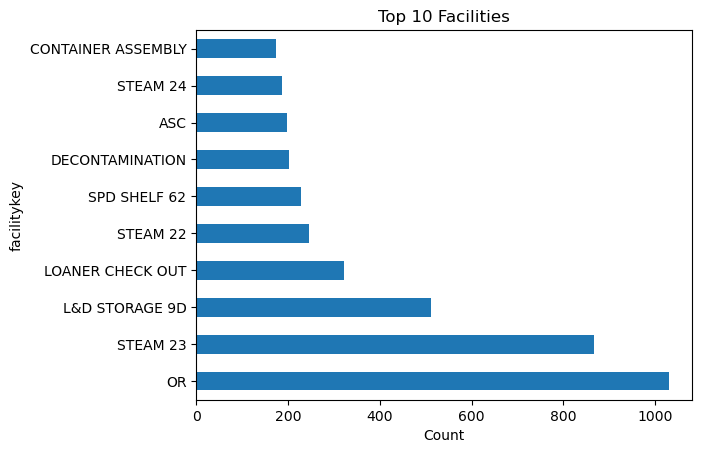

In [32]:
sample_pdf = st_keys.sample(False, 0.05, seed=42).toPandas()

import matplotlib.pyplot as plt
plt.figure()
sample_pdf['facilitykey'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Facilities')
plt.xlabel('Count')
plt.show()


StatementMeta(, f141834d-f039-473b-9f2c-bab796847e27, 35, Finished, Available, Finished)

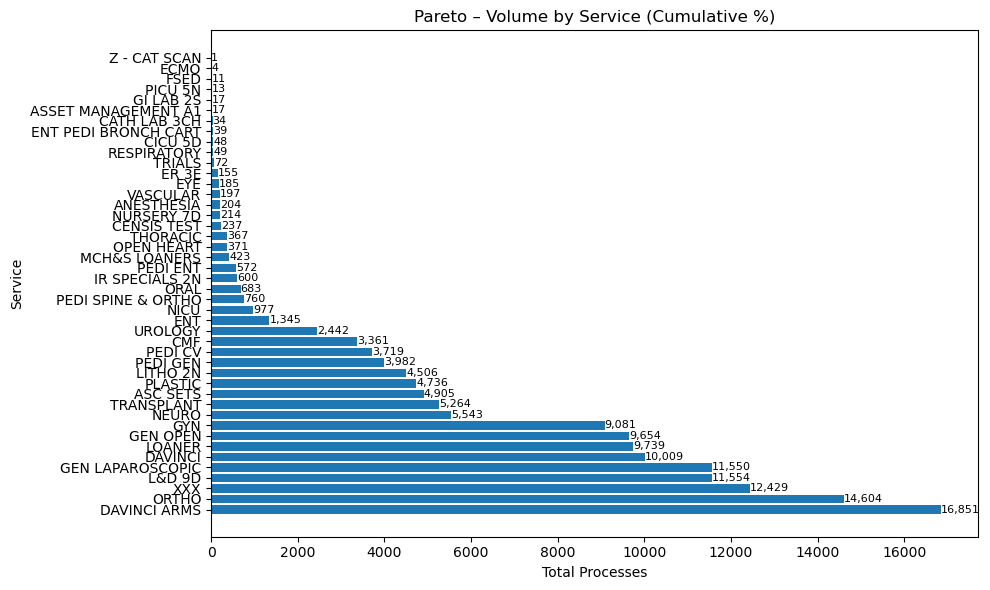

In [33]:
svc_tot = (
    st_norm.groupBy("ServiceNorm")
           .agg(F.count(F.lit(1)).alias("total"))
           .orderBy(F.desc("total"))
)
svc_tot_pd = svc_tot.toPandas().sort_values("total", ascending=False).reset_index(drop=True)
svc_tot_pd["cumpct"] = 100 * svc_tot_pd["total"].cumsum() / svc_tot_pd["total"].sum()

plt.figure(figsize=(10,6))
plt.barh(svc_tot_pd["ServiceNorm"], svc_tot_pd["total"])
for i, v in enumerate(svc_tot_pd["total"]):
    plt.text(v, i, f"{v:,}", va="center", fontsize=8)
plt.title("Pareto – Volume by Service (Cumulative %)")
plt.xlabel("Total Processes")
plt.ylabel("Service")
plt.tight_layout()
plt.show()
